In [13]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Function to parse an RIS file
def parse_ris(file_path):
    records = []
    current_record = {}
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if line.strip() == "":  # End of a record
                if current_record:
                    records.append(current_record)
                    current_record = {}
            else:
                match = re.match(r'^(..)\s+-\s+(.*)$', line)
                if match:
                    tag, content = match.groups()
                    if tag in current_record:
                        current_record[tag].append(content)
                    else:
                        current_record[tag] = [content]
    
    if current_record:  # Add the last record if not already added
        records.append(current_record)
    
    return records

# Function to analyze data
def analyze_data(records):
    # Extract year, journal, and keywords
    years = []
    keywords = []
    
    for record in records:
        if 'PY' in record:  # Year
            years.extend(record['PY'])
        if 'T2' in record:  # Journal
            journal = record['T2']
        if 'KW' in record:  # Keywords
            keywords.extend(record['KW'])
    
    # Count occurrences
    year_count = Counter(years)
    journal_count = Counter(journal)
    keyword_count = Counter(keywords)
    
    return year_count, journal_count, keyword_count

# Function to sparsify year labels on the plot
def sparsify_labels(labels, interval=5):
    return [label if i % interval == 0 else '' for i, label in enumerate(labels)]

# Function to plot statistics
def plot_statistics(year_count, keyword_count):
    # Plot number of papers per year
    years = sorted(year_count.keys())
    counts = [year_count[year] for year in years]
    
    # Sparsify year labels
    sparse_labels = sparsify_labels(years, interval=5)
    
    plt.figure(figsize=(10, 6))
    plt.bar(years, counts, color='skyblue', label='Papers per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Papers')
    plt.title('Number of Papers per Year')
    plt.xticks(ticks=range(len(years)), labels=sparse_labels, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Plot top 10 keywords
    top_keywords = keyword_count.most_common(10)
    keyword_names = [k[0] for k in top_keywords]
    keyword_counts = [k[1] for k in top_keywords]
    
    plt.figure(figsize=(10, 6))
    plt.barh(keyword_names, keyword_counts, color='lightcoral')
    plt.xlabel('Frequency')
    plt.ylabel('Keyword')
    plt.title('Top 10 Keywords')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


Number of Papers per Year:
2019: 45
2013: 30
2020: 35
2022: 38
2017: 24
2024: 28
2010: 21
2003: 9
2016: 24
2001: 10
2018: 34
2021: 30
2012: 26
1998: 9
2023: 20
1996: 7
2000: 6
2005: 14
2009: 24
1991: 3
2006: 9
1984: 1
1997: 5
2011: 13
2025: 2
2014: 28
2015: 19
1992: 4
2007: 9
1994: 6
2008: 13
1962: 2
1999: 4
1995: 4
2004: 9
1954: 1
1989: 1
1979: 1
1981: 1
1960: 1
1987: 1
1966: 2
1926: 1
2002: 4
1957: 1
1976: 1
1990: 1
1967: 1
1983: 1
1931: 1

Top 10 Journals:
CHEMISTRY-A EUROPEAN JOURNAL: 1

Top 10 Keywords:
GROWTH: 72
DERIVATIVES: 28
TEMPERATURE: 26
PERFORMANCE: 25
ANTIBACTERIAL: 25
CONDENSATION: 24
MOISTURE: 20
BUILDINGS: 20
MOLD GROWTH: 19
HUMIDITY: 18


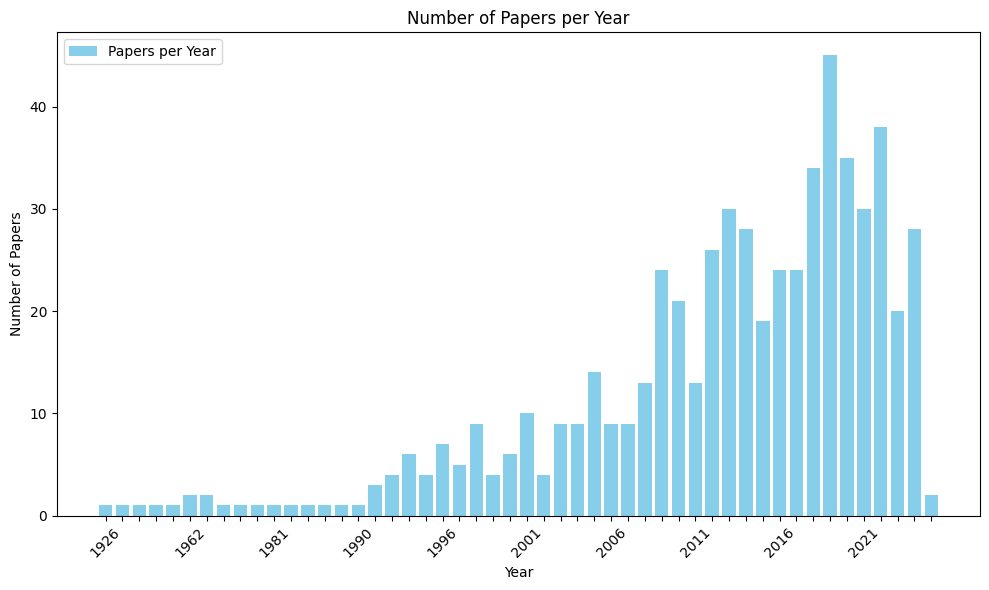

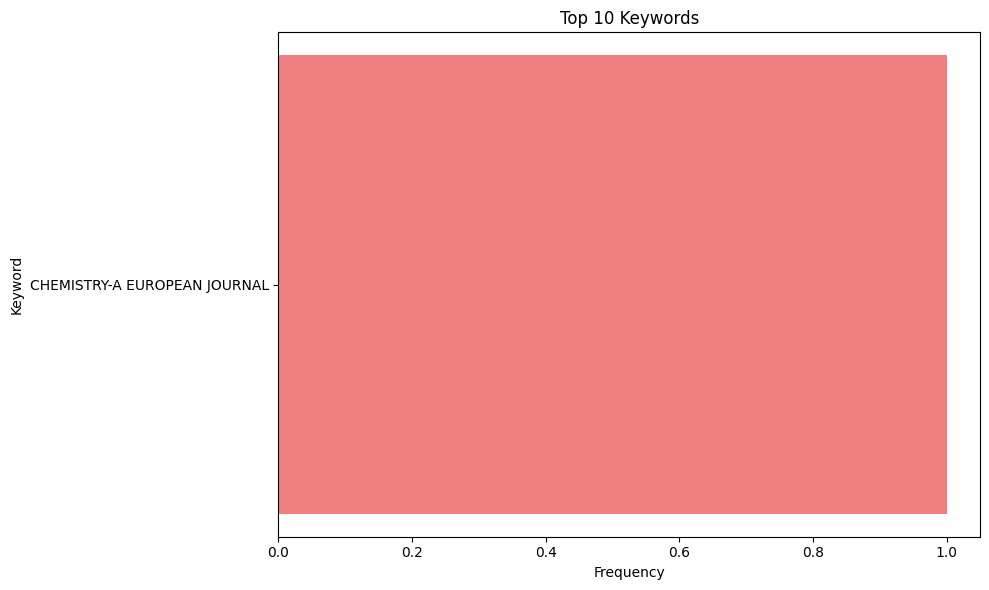

In [14]:
# Path to your RIS file
ris_file_path = r"C:\Users\zl948\Downloads\savedrecs.ris"

# Parse the RIS file
records = parse_ris(ris_file_path)

# Analyze the parsed data
year_count, journal_count, keyword_count = analyze_data(records)

# Display statistics
print("Number of Papers per Year:")
for year, count in year_count.items():
    print(f"{year}: {count}")

print("\nTop 10 Journals:")
for journal, count in journal_count.most_common(10):
    print(f"{journal}: {count}")

print("\nTop 10 Keywords:")
for keyword, count in keyword_count.most_common(10):
    print(f"{keyword}: {count}")

# Plot statistics
plot_statistics(year_count, journal_count)

In [6]:
for rec in records:
    print(rec)
    break

{'AU': ['Lie, SK', 'Thiis, TK', 'Vestol, GI', 'Hoibo, O', 'Gobakken, LR'], 'TI': ['Can existing mould growth models be used to predict mould growth on wooden claddings exposed to transient wetting?'], 'T2': ['BUILDING AND ENVIRONMENT'], 'LA': ['English'], 'KW': ['Wood', 'Facade', 'Weathering', 'Modelling', 'Mould', 'Blue-stain fungi', 'BUILDING-MATERIALS', 'FUNGAL GROWTH', 'COLOR CHANGES', 'TEMPERATURE', 'MOISTURE', 'HUMIDITY', 'DESIGN', 'RISK', 'RESISTANCE', 'PINE'], 'AB': ["Surface mould growth contributes to the colour changes of outdoor exposed wood over time. Modelling mould growth can thus help visualize wooden facades' colour development, which can improve facade design and service life. However, existing wood mould models do not consider transient wetting effects that occur outdoors due to precipitation and condensation. To address this, four mould models were evaluated using laboratory experimental data that included exposure to transient wetting. First, the models (the origin